In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import pickle
from scipy.spatial.distance import squareform
import os
import math
import pandas as pd
import tqdm

In [2]:
# 从文件中读取混淆矩阵
porcupine_cm = np.load('/home/lijy/workspace/sustag/training/output/porcupine/porcupine_c95_confusion_matrix_select.npy')
ont_cm = np.load('/home/lijy/workspace/sustag/training/output/ONT/ont_c95_confusion_matrix_select.npy')
sustag96_cm = np.load('/home/lijy/workspace/sustag/training/output/sustag96/sustag96_c95_confusion_matrix_select.npy')
porcupine_cm_without0 = porcupine_cm[1:, 1:]
ont_cm_without0 = ont_cm[1:, 1:]
sustag96_cm_without0 = sustag96_cm[1:, 1:]

In [3]:
def norm_per_row(confusion_matrix):
    row_sums = confusion_matrix.sum(axis=1, keepdims=True)
    normalized_matrix = confusion_matrix / row_sums
    return normalized_matrix

In [4]:
porcupine_cm_norm = norm_per_row(porcupine_cm)
ont_cm_norm = norm_per_row(ont_cm)
sustag96_cm_norm = norm_per_row(sustag96_cm)

In [28]:
porcupine_cm_without0_norm = norm_per_row(porcupine_cm_without0)
ont_cm_without0_norm = norm_per_row(ont_cm_without0)
sustag96_cm_without0_norm = norm_per_row(sustag96_cm_without0)

Loaded from .npy file:
 [[917   0   0 ...   0   0   0]
 [  0 356   2 ...   0   0   2]
 [  0   0 352 ...   0   0   1]
 ...
 [  0   0   0 ... 371   4   0]
 [  0   0   0 ...   0 402   1]
 [  0   0   0 ...   0   0 376]]
(97, 97)
(97, 97)
(96, 96)


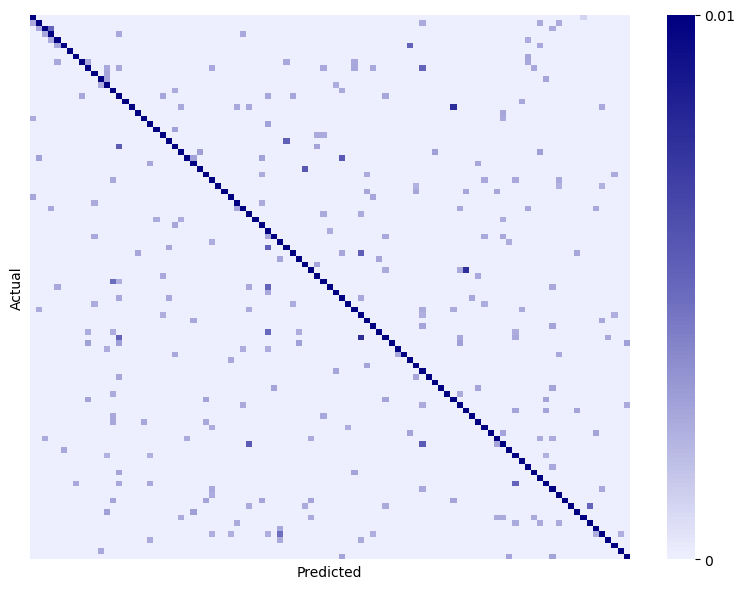

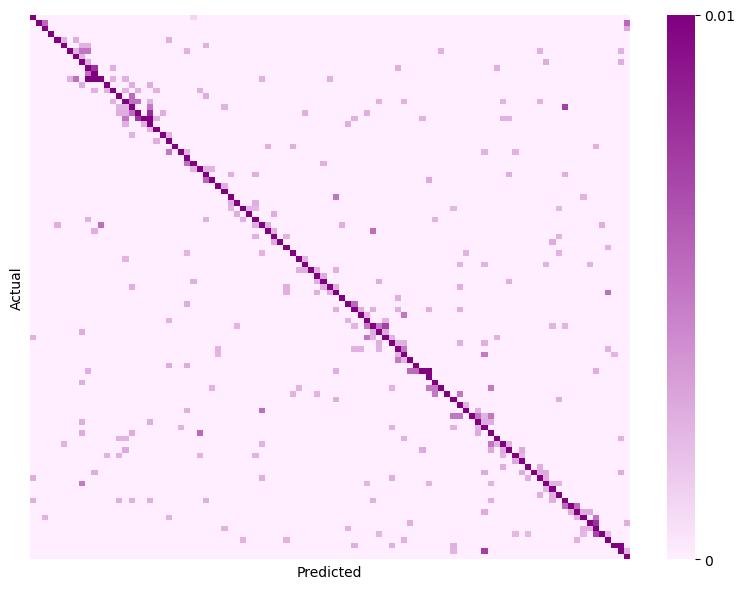

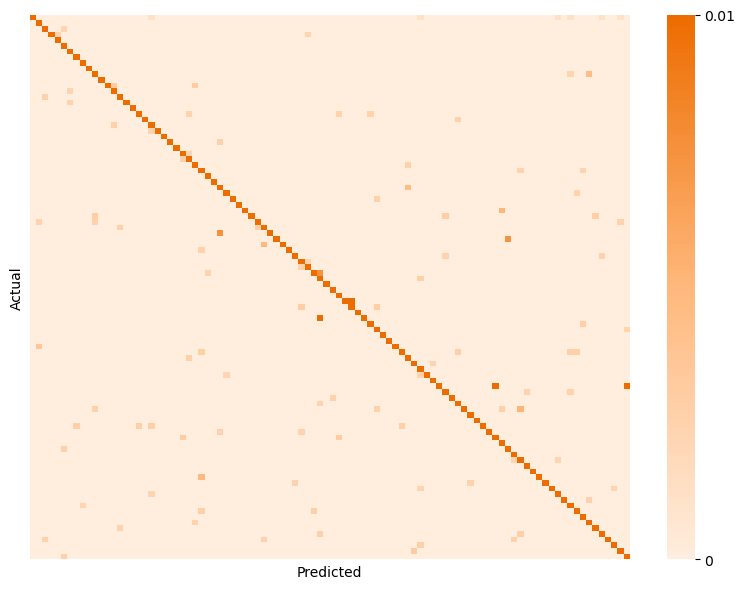

In [7]:
cms = [ont_cm_norm, porcupine_cm_norm, sustag96_cm_norm]
labels = ['ONT', 'Porcupine', 'SUSTag96']
custom_cmaps = [LinearSegmentedColormap.from_list("custom_cmap", ['#eeeffe', '#6767bc', '#000080'], N=128),
                LinearSegmentedColormap.from_list("custom_cmap", ['#ffeeff', '#c374c3', '#800080'], N=128),
                LinearSegmentedColormap.from_list("custom_cmap", ['#ffedde', '#ffb87c', '#ed6c00'], N=128),
               ]

print("Loaded from .npy file:\n", porcupine_cm)

# original_cmap = plt.get_cmap('bone_r')
# new_cmap = truncate_colormap(original_cmap, 0.1, 1.0)



def remove_trailing_zeros(x, pos):
    return ('%f' % x).rstrip('0').rstrip('.')


for i in range(len(cms)):

    cm_withoutun = cms[i]
    print(cm_withoutun.shape)
    
    plt.figure(figsize=(8, 6))
    vmin=0
    vmax=0.01
    ax = sns.heatmap(cm_withoutun, cmap=custom_cmaps[i], annot=False, vmin=vmin, vmax=vmax)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    # 去除x轴和y轴的刻度
    plt.xticks([])
    plt.yticks([])
    
    ticks = np.linspace(vmin,vmax,num=2)
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks(ticks)
    colorbar.set_ticklabels([remove_trailing_zeros(x, None) for x in ticks])
    
    # plt.title('Porcupine Confusion Matrix')
    plt.tight_layout()
    # plt.savefig(f'./{labels[i]}_cm_c95_without0.png', format='png', dpi=500)

Loaded from .npy file:
 [[917   0   0 ...   0   0   0]
 [  0 356   2 ...   0   0   2]
 [  0   0 352 ...   0   0   1]
 ...
 [  0   0   0 ... 371   4   0]
 [  0   0   0 ...   0 402   1]
 [  0   0   0 ...   0   0 376]]


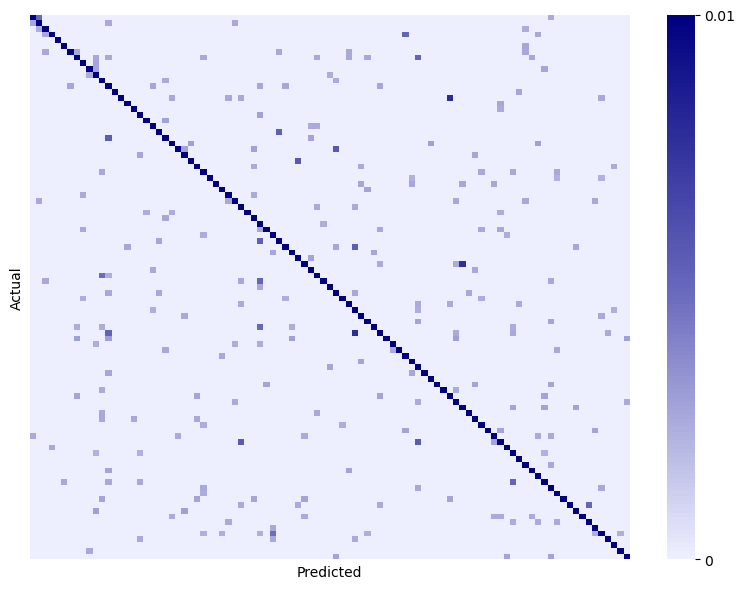

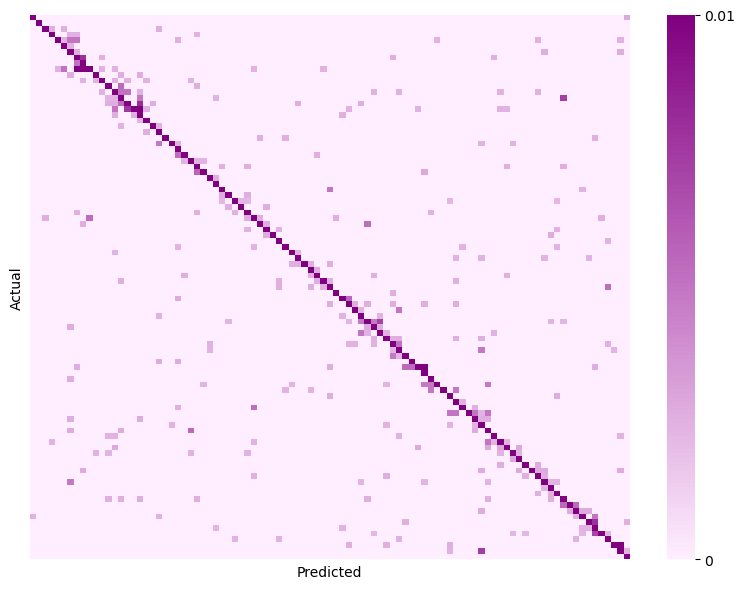

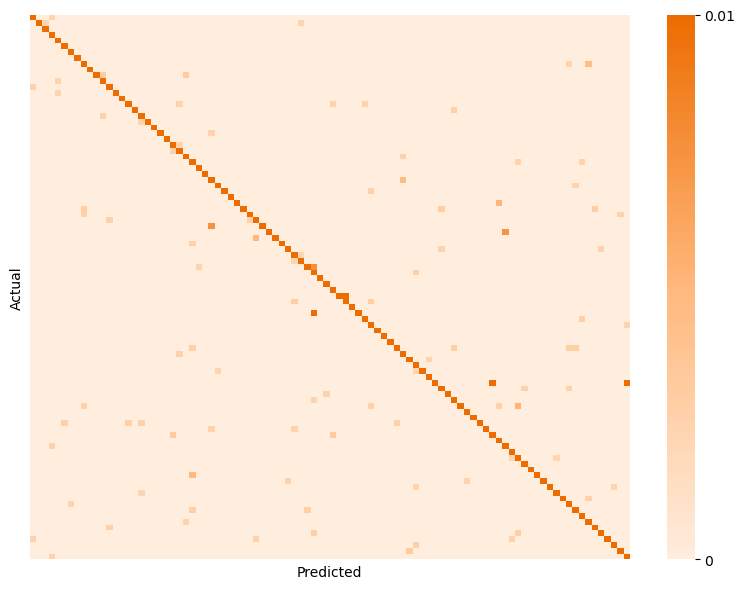

In [31]:

cms = [ont_cm_without0_norm, porcupine_cm_without0_norm, sustag96_cm_without0_norm]
labels = ['ONT', 'Porcupine', 'SUSTag96']
custom_cmaps = [LinearSegmentedColormap.from_list("custom_cmap", ['#eeeffe', '#6767bc', '#000080'], N=128),
                LinearSegmentedColormap.from_list("custom_cmap", ['#ffeeff', '#c374c3', '#800080'], N=128),
                LinearSegmentedColormap.from_list("custom_cmap", ['#ffedde', '#ffb87c', '#ed6c00'], N=128),
               ]

print("Loaded from .npy file:\n", porcupine_cm)

# original_cmap = plt.get_cmap('bone_r')
# new_cmap = truncate_colormap(original_cmap, 0.1, 1.0)



def remove_trailing_zeros(x, pos):
    return ('%f' % x).rstrip('0').rstrip('.')


for i in range(len(cms)):

    cm_withoutun = cms[i][1:, 1:]
    
    plt.figure(figsize=(8, 6))
    vmin=0
    vmax=0.01
    ax = sns.heatmap(cm_withoutun, cmap=custom_cmaps[i], annot=False, vmin=vmin, vmax=vmax)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    # 去除x轴和y轴的刻度
    plt.xticks([])
    plt.yticks([])
    
    ticks = np.linspace(vmin,vmax,num=2)
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks(ticks)
    colorbar.set_ticklabels([remove_trailing_zeros(x, None) for x in ticks])
    
    # plt.title('Porcupine Confusion Matrix')
    plt.tight_layout()
    plt.savefig(f'./{labels[i]}_cm_c95_without0.png', format='png', dpi=500)

In [33]:
sustag96_1dcnn_cm = np.load('/home/lijy/workspace/sustag/training/output/cnn_sustag96_confusion_matrix.npy')
sustag96_cl_cm = np.load('/home/lijy/workspace/sustag/training/output/cnnlstm_sustag96_confusion_matrix.npy')
sustag96_clps_cm = np.load('/home/lijy/workspace/sustag/training/output/sustag96/sustag96_c100_confusion_matrix_select.npy')
sustag96_1dcnn_cm_without0 = sustag96_1dcnn_cm[1:, 1:]
sustag96_cl_cm_without0 = sustag96_cl_cm[1:, 1:]
sustag96_clps_cm_without0 = sustag96_clps_cm[1:, 1:]

In [34]:
def norm_per_row(confusion_matrix):
    row_sums = confusion_matrix.sum(axis=1, keepdims=True)
    normalized_matrix = confusion_matrix / row_sums
    return normalized_matrix

sustag96_1dcnn_cm_without0_norm = sustag96_1dcnn_cm_without0
sustag96_cl_cm_without0_norm = sustag96_cl_cm_without0
sustag96_clps_cm_without0_norm = norm_per_row(sustag96_cm_without0)

Loaded from .npy file:
 [[917   0   0 ...   0   0   0]
 [  0 356   2 ...   0   0   2]
 [  0   0 352 ...   0   0   1]
 ...
 [  0   0   0 ... 371   4   0]
 [  0   0   0 ...   0 402   1]
 [  0   0   0 ...   0   0 376]]


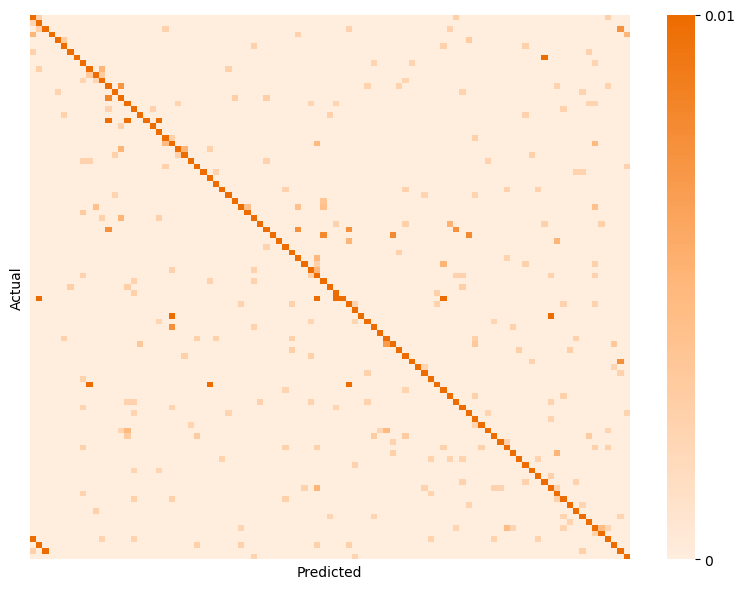

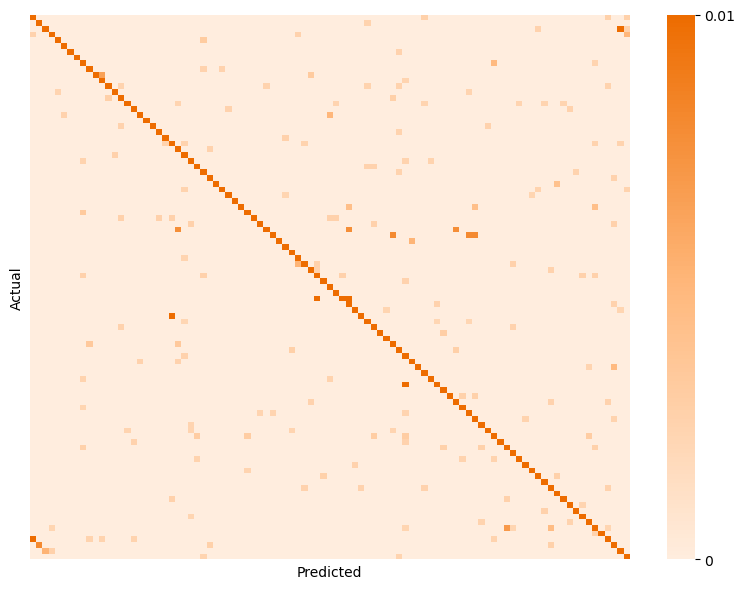

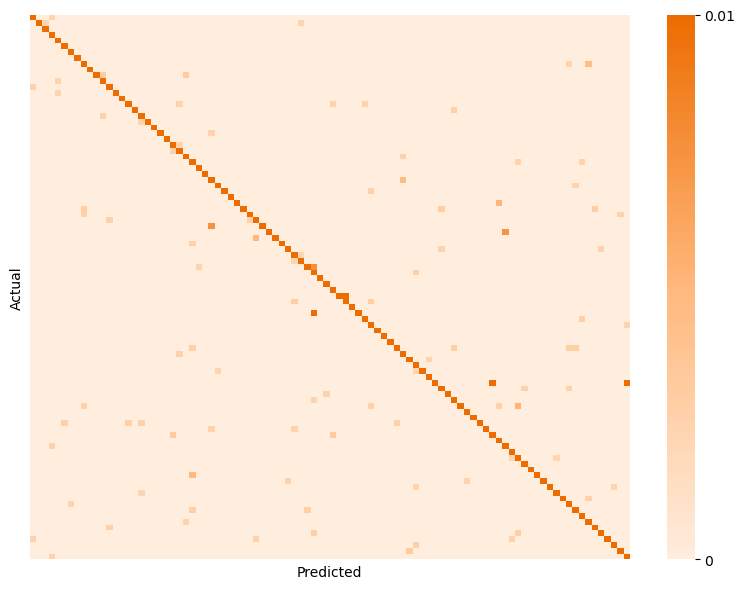

In [37]:

cms = [sustag96_1dcnn_cm_without0_norm, sustag96_cl_cm_without0_norm, sustag96_clps_cm_without0_norm]
labels = ['sustag96_1dCNN', 'sustag96_CNNLSTM', 'sustag96_OR_CNNLSTM_c100']
custom_cmaps = [LinearSegmentedColormap.from_list("custom_cmap", ['#ffedde', '#ffb87c', '#ed6c00'], N=128),
                LinearSegmentedColormap.from_list("custom_cmap", ['#ffedde', '#ffb87c', '#ed6c00'], N=128),
                LinearSegmentedColormap.from_list("custom_cmap", ['#ffedde', '#ffb87c', '#ed6c00'], N=128),
               ]

print("Loaded from .npy file:\n", porcupine_cm)

# original_cmap = plt.get_cmap('bone_r')
# new_cmap = truncate_colormap(original_cmap, 0.1, 1.0)



def remove_trailing_zeros(x, pos):
    return ('%f' % x).rstrip('0').rstrip('.')


for i in range(len(cms)):

    cm_withoutun = cms[i][1:, 1:]
    
    plt.figure(figsize=(8, 6))
    vmin=0
    vmax=0.01
    ax = sns.heatmap(cm_withoutun, cmap=custom_cmaps[i], annot=False, vmin=vmin, vmax=vmax)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    # 去除x轴和y轴的刻度
    plt.xticks([])
    plt.yticks([])
    
    ticks = np.linspace(vmin,vmax,num=2)
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks(ticks)
    colorbar.set_ticklabels([remove_trailing_zeros(x, None) for x in ticks])
    
    # plt.title('Porcupine Confusion Matrix')
    plt.tight_layout()
    plt.savefig(f'./{labels[i]}_cm_without0.png', format='png', dpi=500)